In [1]:
# coding:utf-8

import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [22]:
# フォルダの中にある画像を順次読み込む
# カテゴリーは0から始める


# 画像の反転と回転の実装、またはdata argumentation の実装を行う
X = []
Y = []

#下、後でコード量を減らす
# 対象Aの画像
for picture in list_pictures('./data/train/carot'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(0)


# 対象Bの画像
for picture in list_pictures('./data/train/onion'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(1)
    
# 対象Cの画像
for picture in list_pictures('./data/train/potato'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(2)

# 対象Dの画像
for picture in list_pictures('./data/train/rice'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(3)

# 対象Eの画像
for picture in list_pictures('./data/train/CurryPowder'):
    img = img_to_array(load_img(picture, target_size=(64,64)))
    X.append(img)

    Y.append(4)


# arrayに変換
X = np.asarray(X)
Y = np.asarray(Y)

In [3]:
# 画素値を0から1の範囲に変換
X = X.astype('float32')
X = X / 255.0

# クラスの形式を変換
Y = np_utils.to_categorical(Y, 5)

# 学習用データとテストデータ
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=111)

In [13]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))       # クラスは2個
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

# 実行。出力はなしで設定(verbose=0)。
history = model.fit(X_train, y_train, batch_size=5, epochs=30,
                   validation_data = (X_test, y_test), verbose = 1)



Train on 176 samples, validate on 88 samples
Epoch 1/30

176/176 [==============================] - ETA: 0s - loss: 1.6139 - acc: 0.1818 - val_loss: 1.6372 - val_acc: 0.1591
Epoch 2/30

176/176 [==============================] - ETA: 0s - loss: 1.5891 - acc: 0.2614 - val_loss: 1.6132 - val_acc: 0.1477
Epoch 3/30

140/176 [======================>.......] - ETA: 1s - loss: 1.5533 - acc: 0.3214


176/176 [==============================] - ETA: 0s - loss: 1.5412 - acc: 0.3295 - val_loss: 1.5265 - val_acc: 0.3409
Epoch 4/30

176/176 [==============================] - ETA: 0s - loss: 1.4790 - acc: 0.3693 - val_loss: 1.5803 - val_acc: 0.2273
Epoch 5/30

176/176 [==============================] - ETA: 0s - loss: 1.4354 - acc: 0.3750 - val_loss: 1.4413 - val_acc: 0.4205
Epoch 6/30

100/176 [================>.............] - ETA: 3s - loss: 1.4004 - acc: 0.3900


176/176 [==============================] - ETA: 0s - loss: 1.3459 - acc: 0.4375 - val_loss: 2.1754 - val_acc: 0.2045
Epoch 7/30

176/176 [==============================] - ETA: 0s - loss: 1.4428 - acc: 0.4034 - val_loss: 1.4920 - val_acc: 0.4091
Epoch 8/30

176/176 [==============================] - ETA: 0s - loss: 1.3220 - acc: 0.4773 - val_loss: 1.3557 - val_acc: 0.3523
Epoch 9/30

 60/176 [=========>....................] - ETA: 4s - loss: 1.3362 - acc: 0.5333


176/176 [==============================] - ETA: 0s - loss: 1.3203 - acc: 0.4886 - val_loss: 1.3084 - val_acc: 0.4659
Epoch 10/30

176/176 [==============================] - ETA: 0s - loss: 1.1679 - acc: 0.5568 - val_loss: 1.2996 - val_acc: 0.4773
Epoch 11/30

176/176 [==============================] - ETA: 0s - loss: 1.1988 - acc: 0.5284 - val_loss: 1.2352 - val_acc: 0.4773
Epoch 12/30

 20/176 [==>...........................] - ETA: 7s - loss: 1.1795 - acc: 0.5500


176/176 [==============================] - ETA: 0s - loss: 1.1697 - acc: 0.5625 - val_loss: 1.5809 - val_acc: 0.1932
Epoch 13/30

176/176 [==============================] - ETA: 0s - loss: 1.1978 - acc: 0.5398 - val_loss: 1.2341 - val_acc: 0.4659
Epoch 14/30

165/176 [===========================>..] - ETA: 0s - loss: 1.1176 - acc: 0.6000


176/176 [==============================] - ETA: 0s - loss: 1.1074 - acc: 0.5966 - val_loss: 1.7129 - val_acc: 0.3523
Epoch 15/30

176/176 [==============================] - ETA: 0s - loss: 1.0021 - acc: 0.6420 - val_loss: 3.5357 - val_acc: 0.3750
Epoch 16/30

176/176 [==============================] - ETA: 0s - loss: 1.1635 - acc: 0.6193 - val_loss: 1.1782 - val_acc: 0.5227
Epoch 17/30

125/176 [====================>.........] - ETA: 2s - loss: 1.1182 - acc: 0.6160


176/176 [==============================] - ETA: 0s - loss: 1.1061 - acc: 0.5966 - val_loss: 1.3575 - val_acc: 0.4432
Epoch 18/30

176/176 [==============================] - ETA: 0s - loss: 0.9769 - acc: 0.6136 - val_loss: 1.2517 - val_acc: 0.4545
Epoch 19/30

176/176 [==============================] - ETA: 0s - loss: 0.9618 - acc: 0.6705 - val_loss: 1.2357 - val_acc: 0.5000
Epoch 20/30

 85/176 [=============>................] - ETA: 3s - loss: 0.7983 - acc: 0.6941


176/176 [==============================] - ETA: 0s - loss: 0.8804 - acc: 0.6591 - val_loss: 1.2246 - val_acc: 0.5227
Epoch 21/30

176/176 [==============================] - ETA: 0s - loss: 0.9052 - acc: 0.6591 - val_loss: 1.2752 - val_acc: 0.5114
Epoch 22/30

176/176 [==============================] - ETA: 0s - loss: 0.8261 - acc: 0.7273 - val_loss: 1.5692 - val_acc: 0.5000
Epoch 23/30

 45/176 [======>.......................] - ETA: 5s - loss: 0.8328 - acc: 0.7333


176/176 [==============================] - ETA: 0s - loss: 0.8546 - acc: 0.7159 - val_loss: 1.4340 - val_acc: 0.4318
Epoch 24/30

176/176 [==============================] - ETA: 0s - loss: 0.9192 - acc: 0.6875 - val_loss: 1.1097 - val_acc: 0.5682
Epoch 25/30

176/176 [==============================] - ETA: 0s - loss: 0.8004 - acc: 0.7386 - val_loss: 1.3694 - val_acc: 0.4205
Epoch 26/30

  5/176 [..............................] - ETA: 6s - loss: 0.4232 - acc: 0.8000


176/176 [==============================] - ETA: 0s - loss: 0.7218 - acc: 0.7500 - val_loss: 1.6560 - val_acc: 0.4659
Epoch 27/30

176/176 [==============================] - ETA: 0s - loss: 0.6522 - acc: 0.7955 - val_loss: 1.1990 - val_acc: 0.5114
Epoch 28/30

150/176 [========================>.....] - ETA: 1s - loss: 0.6754 - acc: 0.7333


176/176 [==============================] - ETA: 0s - loss: 0.6910 - acc: 0.7443 - val_loss: 1.8698 - val_acc: 0.4318
Epoch 29/30

176/176 [==============================] - ETA: 0s - loss: 0.6611 - acc: 0.7955 - val_loss: 1.1791 - val_acc: 0.5568
Epoch 30/30

176/176 [==============================] - ETA: 0s - loss: 0.5801 - acc: 0.7955 - val_loss: 1.3275 - val_acc: 0.4545


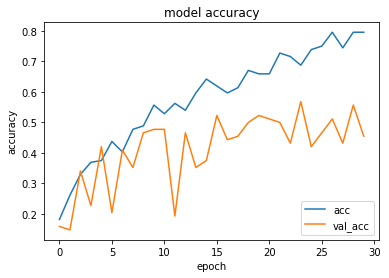

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right') #グラフの凡例を用意している
plt.show()

In [15]:
# テストデータに適用
predict_classes = model.predict_classes(X_test)

# マージ。yのデータは元に戻す
mg_df = pd.DataFrame({'predict': predict_classes, 'class': np.argmax(y_test, axis=1)})

# confusion matrix
pd.crosstab(mg_df['class'], mg_df['predict'])


88/88 [==============================] - ETA: 0s


predict,0,1,2,3,4
class,,,,,
0,9,1,3,7,5
1,1,7,0,5,1
2,0,9,2,5,2
3,0,3,1,14,0
4,2,0,0,3,8


In [21]:
def train_and_evaluate_model(model,data,labels,data_test,labels_test):
# def train_and_evaluate_model(model, data[train], labels[train], data[test], labels[test]):
    model.fit(data, labels, batch_size=32, epochs=30,verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
    return model.evaluate(data_test, labels_test, verbose=1)  # Evaluate the trained model on the test set!
#損失値と評価の値を算出している
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import StratifiedKFold
# kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
# print(cross_val_score(model, image_list, label_list,cv=kfold)).mean()  
from sklearn.cross_validation import StratifiedKFold
label = np.r_[np.repeat(0,14), np.repeat(1,2)]
skf = StratifiedKFold(label, n_folds=5, shuffle=False)
total_score = 0
rep = 0
print("success")
for i, (train, test) in enumerate(skf):
    print("TRAIN:", train, "TEST:", test)
    total_score += train_and_evaluate_model(model, X_train[train], y_train[train], X_train[test], y_train[test])[1]
    rep+=1
# print(total_score/rep)
print("%.10f" % (total_score/rep))

/Users/kokimadono/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/cross_validation.py:552: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


success
TRAIN: [ 3  4  5  6  7  8  9 10 11 12 13 15] TEST: [ 0  1  2 14]
Train on 10 samples, validate on 2 samples
Epoch 1/30

10/10 [==============================] - ETA: 0s - loss: 2.7441e-04 - acc: 1.0000 - val_loss: 3.4214e-05 - val_acc: 1.0000
Epoch 2/30

10/10 [==============================] - ETA: 0s - loss: 0.0030 - acc: 1.0000 - val_loss: 3.3320e-05 - val_acc: 1.0000
Epoch 3/30

10/10 [==============================] - ETA: 0s - loss: 4.7208e-04 - acc: 1.0000 - val_loss: 3.3051e-05 - val_acc: 1.0000
Epoch 4/30

10/10 [==============================] - ETA: 0s - loss: 0.0011 - acc: 1.0000 - val_loss: 3.3558e-05 - val_acc: 1.0000
Epoch 5/30

10/10 [==============================] - ETA: 0s - loss: 0.0025 - acc: 1.0000 - val_loss: 3.2396e-05 - val_acc: 1.0000
Epoch 6/30

10/10 [==============================] - ETA: 0s - loss: 1.5409e-04 - acc: 1.0000 - val_loss: 3.2396e-05 - val_acc: 1.0000
Epoch 7/30

10/10 [==============================] - ETA: 0s - loss: 3.6721e-04 - acc:


4/4 [==============================] - ETA: 0s
TRAIN: [ 0  1  2  3  4  5  9 10 11 12 13 14 15] TEST: [6 7 8]
Train on 11 samples, validate on 2 samples
Epoch 1/30

11/11 [==============================] - ETA: 0s - loss: 0.0015 - acc: 1.0000 - val_loss: 0.3584 - val_acc: 1.0000
Epoch 2/30

11/11 [==============================] - ETA: 0s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.3709 - val_acc: 0.5000
Epoch 3/30

11/11 [==============================] - ETA: 0s - loss: 6.4003e-04 - acc: 1.0000 - val_loss: 0.3737 - val_acc: 0.5000
Epoch 4/30

11/11 [==============================] - ETA: 0s - loss: 6.6909e-04 - acc: 1.0000 - val_loss: 0.3708 - val_acc: 0.5000
Epoch 5/30

11/11 [==============================] - ETA: 0s - loss: 0.0044 - acc: 1.0000 - val_loss: 0.3483 - val_acc: 1.0000
Epoch 6/30

11/11 [==============================] - ETA: 0s - loss: 4.4314e-04 - acc: 1.0000 - val_loss: 0.3500 - val_acc: 1.0000
Epoch 7/30

11/11 [==============================] - ETA: 0s - loss: 0.00


12/12 [==============================] - ETA: 0s - loss: 0.5644 - acc: 0.7500 - val_loss: 1.6019 - val_acc: 0.5000
Epoch 2/30

12/12 [==============================] - ETA: 0s - loss: 0.5098 - acc: 0.9167 - val_loss: 0.5100 - val_acc: 0.5000
Epoch 3/30

12/12 [==============================] - ETA: 0s - loss: 0.0101 - acc: 1.0000 - val_loss: 0.5744 - val_acc: 0.5000
Epoch 4/30

12/12 [==============================] - ETA: 0s - loss: 0.0056 - acc: 1.0000 - val_loss: 0.5913 - val_acc: 0.5000
Epoch 5/30

12/12 [==============================] - ETA: 0s - loss: 0.0043 - acc: 1.0000 - val_loss: 0.5990 - val_acc: 0.5000
Epoch 6/30

12/12 [==============================] - ETA: 0s - loss: 0.0039 - acc: 1.0000 - val_loss: 0.6083 - val_acc: 0.5000
Epoch 7/30

12/12 [==============================] - ETA: 0s - loss: 0.0091 - acc: 1.0000 - val_loss: 0.5844 - val_acc: 0.5000
Epoch 8/30

12/12 [==============================] - ETA: 0s - loss: 0.0096 - acc: 1.0000 - val_loss: 0.5791 - val_acc: 0.